# Capstone Webscrapping using BeautifulSoup


## background

At this Notebook is the results for the web scraping of *CoinGecko* Website to search for Ethereum Volume / day. *CoinGecko* itself is a website to democratize the access of crypto data and empower users with actionable insights. *Coingecko* also deep dive into the crypto space to deliver valuable insights to the users through Coingecko cryptocurrency reports, as well as their publications, newsletter and more.

On this notebook we will scrap 2 points from CoinGecko, one is Volume and the other is the Date of the Volume in the last 2 months to analyze the trend on Ethereum.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [55]:
import requests
url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30', headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [56]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [57]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. On the inspect element of the Main Table There is Date, Market Cap, Volume, Open Price, and Close Price.

In [58]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:750])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-c


On this codes section we will find the amount of row length that the website gives so we can predict the amount days to find the correct trends of Ethereum.

In [59]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

60

The Scraping process of CoinGecko is pretty Challeging as the column to collect the data is on main Class 'text-center' so in the conclusion the data is still **NOT CORRECT** as the data still in one big mess.

In [60]:
temp = [] #init

for i in range(1, row_length):
    
    #get date 
    date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    
    #get volume
    volume = table.find_all('td', attrs={'class':'text-center'})[i * 1 + 3].text
    volume = volume.strip() #to remove excess white space 
    
    temp.append((date,volume)) 
    
temp 

[('2021-06-29', '$243,040,539,437'),
 ('2021-06-28', '$30,629,329,806'),
 ('2021-06-27', '$2,087.52'),
 ('2021-06-26', '$2,169.40'),
 ('2021-06-25', '$229,354,016,311'),
 ('2021-06-24', '$24,316,408,028'),
 ('2021-06-23', '$1,973.93'),
 ('2021-06-22', '$2,087.52'),
 ('2021-06-21', '$209,989,265,221'),
 ('2021-06-20', '$24,249,510,321'),
 ('2021-06-19', '$1,817.05'),
 ('2021-06-18', '$1,973.93'),
 ('2021-06-17', '$213,871,849,532'),
 ('2021-06-16', '$25,981,381,067'),
 ('2021-06-15', '$1,833.46'),
 ('2021-06-14', '$1,817.05'),
 ('2021-06-13', '$231,644,258,719'),
 ('2021-06-12', '$22,447,489,242'),
 ('2021-06-11', '$1,990.08'),
 ('2021-06-10', '$1,833.46'),
 ('2021-06-09', '$229,518,675,837'),
 ('2021-06-08', '$28,098,744,045'),
 ('2021-06-07', '$1,971.11'),
 ('2021-06-06', '$1,990.08'),
 ('2021-06-05', '$216,876,757,209'),
 ('2021-06-04', '$38,755,019,937'),
 ('2021-06-03', '$1,875.36'),
 ('2021-06-02', '$1,971.11'),
 ('2021-06-01', '$223,202,708,789'),
 ('2021-05-31', '$39,499,960,408

## Creating data frame & Data wrangling

The Dataframe from the Website is completed to get the Date and Volume Datas.

In [61]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','volume'))
df.head()

,date,volume
0,2021-06-29,"$243,040,539,437"
1,2021-06-28,"$30,629,329,806"
2,2021-06-27,"$2,087.52"
3,2021-06-26,"$2,169.40"
4,2021-06-25,"$229,354,016,311"


The Data Cleaning is a must as the all of the data still got commas, Dots, and Dollar Sign Currencies that not allowing the data to change from object to float.

In [62]:
df.dtypes

date      object
volume    object
dtype: object

In [63]:
df['volume'] = df['volume'].str.replace("$","")
df['volume'] = df['volume'].str.replace(",","")
df['volume'] = df['volume'].str.replace(".","")
df['volume'] = df['volume'].astype('float64')
df['date'] = df['date'].astype('datetime64')

df.dtypes

C:\Users\Dimas Rizki Haikal\AppData\Local\Temp\ipykernel_3768\4196332897.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace("$","")
C:\Users\Dimas Rizki Haikal\AppData\Local\Temp\ipykernel_3768\4196332897.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace(".","")


date      datetime64[ns]
volume           float64
dtype: object

In [64]:
df.head()

,date,volume
0,2021-06-29,2.430405e+11
1,2021-06-28,3.062933e+10
2,2021-06-27,2.087520e+05
3,2021-06-26,2.169400e+05
4,2021-06-25,2.293540e+11


this is Data Visualization of CoinGecko.

In [65]:
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

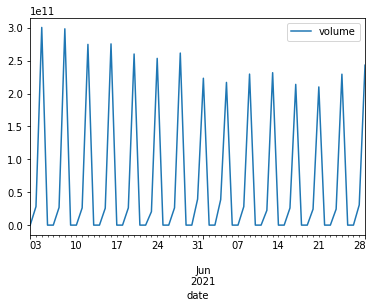

In [66]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

On my Analysis the Data Scraping on CoinGecko is pretty challeging for beginner like me to find the correct *looping* system to get the correct data on 1 big sub class 'text-center'.

So the conclusion is the volume of Entherium May 2021 to June 2021 has fluctuation on 1 weeks but constantly staying at around 50 million $.